# Some basic statistics on the Akkadian ORACC corpus

In [1]:
import glob
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
%pylab inline
matplotlib.style.use('ggplot')

Populating the interactive namespace from numpy and matplotlib


# Load the data

In [3]:
path =r'output' # indicate the local path where files are stored
allFiles = glob.glob(path + "/*.csv")
list_ = []
files_ = []
for file_ in allFiles:
    df = pd.read_csv(file_,index_col=None, header=0)
    df['id_text'] = [file_[7:-4].replace('_', '/') + '/' + text for text in df['id_text']]
    df['lemma'] = [lemma.replace('$', '') for lemma in df['lemma']]
    list_.append(df)
    files_.append(file_[7:-4].replace('_', '/'))
data = pd.concat(list_).reset_index(drop=True)

# How many texts are included?

In [4]:
data.shape
data.iloc[0,1]

"ēkallu[palace]N Aššur-ahu-iddina[Esarhaddon-king-of-Assyria]RN šarru[king]N rabû[great]AJ šarru[king]N dannu[strong]AJ šarru[king]N kiššatu[totality]N šarru[king]N mātu[land]N Aššur[Assyria]GN šakkanakku[(military)-governor]N Babili[Babylon]SN šarru[king]N mātu[land]N Šumeru[Sumer]GN u[and]CNJ Akkad[1]GN šarru[king]N kibru[bank]N erbe[four]NU rēʾû[shepherd]N kīnu[permanent]AJ migru[consent]N ilu[god]N rabû[great]AJ ša[that]REL ištu[from]PRP ṣehru[(time-of)-youth]N Aššur[1]DN Šamaš[1]DN Bel[1]DN u[and]CNJ Nabu[1]DN Ištar[1]DN ša[of]DET Ninua[Nineveh]SN Ištar[1]DN ša[of]DET Arba-il[Arbela]SN ana[to]PRP šarrūtu[kingship]N mātu[land]N Aššur[Assyria]GN nabû[name]V zikru[utterance]N ša[that]REL ahu[brother]N rabû[great]AJ ahu[brother]N ṣehru[small]AJ anāku[I]IP ina[in]PRP qibītu[speech]N Aššur[1]DN Sin[1]DN Šamaš[1]DN Bel[1]DN u[and]CNJ Nabu[1]DN Ištar[1]DN ša[of]DET Ninua[Nineveh]SN Ištar[1]DN ša[of]DET Arba-il[Arbela]SN abu[father]N bānû[creator]N ina[in]PRP puhru[assembly]N ahu[brother]N

In [5]:
length = [text[:5] for text in data['lemma']]
length

['ēkall',
 'ēkall',
 'x[NA]',
 'x[NA]',
 'ša[th',
 'x[NA]',
 'u[and',
 'x[NA]',
 'x[NA]',
 'Aššur',
 'Aššur',
 'Aššur',
 'Aššur',
 'x-te[',
 'x-ʾa-',
 'x[NA]',
 'šarru',
 'x[NA]',
 'x[NA]',
 'ēkall',
 'ēkall',
 'ēkall',
 'anāku',
 'ēkall',
 'ēkall',
 'x[NA]',
 'ēkall',
 'ēkall',
 'ēkall',
 'x[NA]',
 'x[NA]',
 'x[NA]',
 'x[NA]',
 'x[NA]',
 'x[NA]',
 'x[NA]',
 'x[NA]',
 'x[NA]',
 'x[NA]',
 'x[NA]',
 'x[NA]',
 'x[NA]',
 'anāku',
 'anāku',
 'anāku',
 'ēkall',
 'aplu[',
 'inu[w',
 'x[NA]',
 'x[NA]',
 'x[NA]',
 'x-tum',
 'x[NA]',
 'x[NA]',
 'x[NA]',
 'x[NA]',
 'Aššur',
 'Aššur',
 'Aššur',
 'u[and',
 'ēkall',
 'ēkall',
 'ēkall',
 'anāku',
 'Aššur',
 'x[NA]',
 'ana[t',
 'ana[t',
 'ēkall',
 'ēkall',
 'x[NA]',
 'anāku',
 'anāku',
 'Aššur',
 'Aššur',
 'Aššur',
 'Aššur',
 'māru[',
 'ēkall',
 'ēkall',
 'ēkall',
 'ēkall',
 'ēkall',
 'x[NA]',
 'x[NA]',
 'ēkall',
 'ēkall',
 'Aššur',
 'makkū',
 'Aššur',
 'anāku',
 'anāku',
 'Aššur',
 'x[NA]',
 'Aššur',
 'Aššur',
 'x[NA]',
 'x[NA]',
 'Aššur',
 'Aššur',


In [6]:
#tokenize the data by splitting on white space. There is no punctuation in this text.
data['tokens'] = data['lemma'].str.split()
data['tokens'][0]

['ēkallu[palace]N',
 'Aššur-ahu-iddina[Esarhaddon-king-of-Assyria]RN',
 'šarru[king]N',
 'rabû[great]AJ',
 'šarru[king]N',
 'dannu[strong]AJ',
 'šarru[king]N',
 'kiššatu[totality]N',
 'šarru[king]N',
 'mātu[land]N',
 'Aššur[Assyria]GN',
 'šakkanakku[(military)-governor]N',
 'Babili[Babylon]SN',
 'šarru[king]N',
 'mātu[land]N',
 'Šumeru[Sumer]GN',
 'u[and]CNJ',
 'Akkad[1]GN',
 'šarru[king]N',
 'kibru[bank]N',
 'erbe[four]NU',
 'rēʾû[shepherd]N',
 'kīnu[permanent]AJ',
 'migru[consent]N',
 'ilu[god]N',
 'rabû[great]AJ',
 'ša[that]REL',
 'ištu[from]PRP',
 'ṣehru[(time-of)-youth]N',
 'Aššur[1]DN',
 'Šamaš[1]DN',
 'Bel[1]DN',
 'u[and]CNJ',
 'Nabu[1]DN',
 'Ištar[1]DN',
 'ša[of]DET',
 'Ninua[Nineveh]SN',
 'Ištar[1]DN',
 'ša[of]DET',
 'Arba-il[Arbela]SN',
 'ana[to]PRP',
 'šarrūtu[kingship]N',
 'mātu[land]N',
 'Aššur[Assyria]GN',
 'nabû[name]V',
 'zikru[utterance]N',
 'ša[that]REL',
 'ahu[brother]N',
 'rabû[great]AJ',
 'ahu[brother]N',
 'ṣehru[small]AJ',
 'anāku[I]IP',
 'ina[in]PRP',
 'qibītu[sp

In [7]:
# Data Wrangling
import os
import numpy as np
import pandas
import gensim #library needed for word2vec

#for visualization
from scipy.spatial.distance import cosine
from sklearn.metrics import pairwise
from sklearn.manifold import MDS, TSNE

In [8]:
#fit a word2vec model on the tokenized data, with all the default options
#setting the 'worker' option to 1 should ensure reproducibility
#As per the docs of Gensim, for executing a fully deterministically-reproducible run, 
#you must also limit the model to a single worker thread, 
#to eliminate ordering jitter from OS thread scheduling.

model = gensim.models.Word2Vec(data['tokens'], size=100, window=5, \
                               min_count=1, sg=1, alpha=0.025, iter=5, batch_words=10000, workers=1)

In [9]:
#view the 100 element vector for the word 'ēkallu[palace]N'
#each token (not document) has a 100 element vector
model['ēkallu[palace]N']

array([ 0.47302204,  0.07785355, -0.82746506, -0.72508746,  0.92537153,
        0.06848179, -0.92494702,  0.03716886, -0.39116985, -0.24041587,
       -0.75834864, -0.1879009 , -0.3601329 , -0.01046031, -0.61109668,
        0.35505787, -0.14480564, -0.24380729, -0.64149344, -0.37350339,
        0.30772924, -0.52797788, -0.10372764, -0.04267631, -0.01136733,
       -0.32982594, -0.56512582, -0.13610716,  0.74019831,  0.29391351,
        0.02861392,  0.22603001, -0.11668228, -0.58411294,  0.65562284,
       -0.41151461, -0.06799246,  1.15121889,  0.04055942,  1.07359433,
        0.30408713,  0.2079791 , -0.52767998,  0.55884862, -0.2081421 ,
        0.02775201,  0.33216116, -0.39713901, -0.01599537, -0.32655734,
        0.23409082,  0.16583994,  0.42806193, -0.21396062, -0.52001572,
        0.14936556,  0.37794867,  0.48803383,  0.4335092 ,  0.52956861,
       -0.22209182, -0.79170316, -0.05229173,  0.44065771, -0.13429141,
       -0.00135767, -0.09111213, -0.69423318, -0.26984847,  0.78

In [10]:
# Find cosine distance between two given word vectors
model.similarity('ēkallu[palace]N','muhhu[skull]N')

0.47636100575280826

In [11]:
#find the 10 most similar vectors to the given word vector
model.most_similar('ēkallu[palace]N')
#model.most_similar('muhhu[skull]N')

[('māšartu[inspection]N', 0.6786848306655884),
 ('muštaʾʾûtu[leisure]N', 0.6745121479034424),
 ('kisirtu[wall-facing]N', 0.6618810892105103),
 ('asmiš[in-a-fitting-manner]AV', 0.6552914381027222),
 ('tīru[courtier]N', 0.6474878787994385),
 ('Karib-il[king-of-Saba]RN', 0.6446529626846313),
 ('hilāni[portico(ed-building)]N', 0.6443392038345337),
 ('ridûtu[appropriation]N', 0.6382260322570801),
 ('ēkurru[temple]N', 0.6367661356925964),
 ('sekretu[enclosed-(woman)]N', 0.6350910067558289)]

In [12]:
model.similarity('immeru[sheep]N','puhādu[lamb]N')

0.82534988162172362

In [13]:
model.similarity('arhu[cow]N','būru[(bull)-calf]N')

0.84578141615976354

In [14]:
model.similarity('immeru[sheep]N','būru[(bull)-calf]N')

0.78933643591212321

In [15]:
model.most_similar('immeru[sheep]N')

[('puhādu[lamb]N', 0.8253498673439026),
 ('alpu[ox]N', 0.8135159015655518),
 ('hitpu[(an-animal-sacrifice)]N', 0.7895601987838745),
 ('būru[(bull)-calf]N', 0.7893364429473877),
 ('1{+en}[NA]NA', 0.7887165546417236),
 ('yābilu[ram]N', 0.7877925038337708),
 ('udukalû[(a-kind-of-sacrificial-sheep)]N', 0.7853507995605469),
 ('alpu[bull]N', 0.7813907861709595),
 ('rapaštu[loin]N', 0.777344822883606),
 ('bašlu[cooked]AJ', 0.7762169241905212)]

In [16]:
model.most_similar('arhu[cow]N')

[('rapādu[(a-disease-of-the-joints?)]N', 0.9425835609436035),
 ('abunnatu[umbilical-cord]N', 0.9339354634284973),
 ('lītu[cow]N', 0.933321475982666),
 ('tālittu[offspring-of-animals]N', 0.9328945875167847),
 ('nakdu[beaten]AJ', 0.9307528138160706),
 ('šuhhû[have-(illicit)-sexual-intercourse]V', 0.9306400418281555),
 ('raqqu[thin]AJ', 0.9300212860107422),
 ('burrumu[multicoloured]AJ', 0.929273247718811),
 ('ruṭibtu[dampness]N', 0.9288992881774902),
 ('{mul₄}U.RI.RI[NA]NA', 0.9286242127418518)]

In [17]:
#For analogies, use both positive and negative vectors
#this analogy doesn't seem to work
model.most_similar(positive=['arhu[cow]N', 'puhādu[lamb]N'], negative=['immeru[sheep]N'])

[('hašhūru[(a-fruit-tree)]N', 0.8782917261123657),
 ('risnu[soaking]N', 0.873299241065979),
 ('rapādu[(a-disease-of-the-joints?)]N', 0.8727520704269409),
 ('kamūnu[(a-fungus)]N', 0.871238112449646),
 ('pitiltu[string]N', 0.8712359666824341),
 ('kulbābu[ant]N', 0.8707455396652222),
 ('šūmū[garlic]N', 0.8678215742111206),
 ('samānu[(a-skin-disease)]N', 0.8674834370613098),
 ('adirtu[gloominess]N', 0.8671481013298035),
 ('himṭu[burning]N', 0.8671295642852783)]

In [18]:
#this one works better. I'm at least getting the target word here, "lamb", although it's not the top choice
model.most_similar(positive=['immeru[sheep]N', 'būru[(bull)-calf]N'], negative=['arhu[cow]N'])

[('1{+en}[NA]NA', 0.760309100151062),
 ('puhādu[lamb]N', 0.7412097454071045),
 ('saddinu[(a-tunic)]N', 0.737127959728241),
 ('2-TA[NA]NA', 0.7334198951721191),
 ('šappatu[(a-pottery-vessel)]N', 0.7322150468826294),
 ('šappu[(a-vessel)]N', 0.7312219142913818),
 ('hitpu[(an-animal-sacrifice)]N', 0.7234444618225098),
 ('alpu[ox]N', 0.7213095426559448),
 ('3-TA[NA]NA', 0.720317006111145),
 ('sūtu[unit]N', 0.7172187566757202)]

In [21]:
#you can find the most similar vectors to two or more given word vectors.
#Note the brackets here
model.most_similar(['damqu[good]AJ', 'ṭābu[good]AJ'])

[('hadû[joyful]AJ', 0.8387885093688965),
 ('mādiš[greatly]AV', 0.8366856575012207),
 ('hissatu[understanding]N', 0.8266851902008057),
 ('tūra[again]AV', 0.8263546824455261),
 ('turru[turned]AJ', 0.8230162858963013),
 ('šēhu[wind]N', 0.8216396570205688),
 ('kalûtu[lamentation-priesthood]N', 0.8204102516174316),
 ('zêru[hate]V', 0.8185923099517822),
 ('kabātu[be(come)-heavy]V', 0.8135282397270203),
 ('kunnu[fixed]AJ', 0.8115489482879639)]

In [22]:
#visualize the 50 most similar vectors to two words meaning 'good'
good_tokens = [token for token,weight in model.most_similar(['damqu[good]AJ', 'ṭābu[good]AJ'], topn=50)]

In [23]:
vectors = [model[word] for word in good_tokens]  

In [24]:
#compute pairwise cosine similarity scores
dist_matrix = pairwise.pairwise_distances(vectors, metric='cosine')

In [25]:
# Multi-Dimensional Scaling (Project vectors into 2-D)

mds = MDS(n_components = 2, dissimilarity='precomputed')
embeddings = mds.fit_transform(dist_matrix)

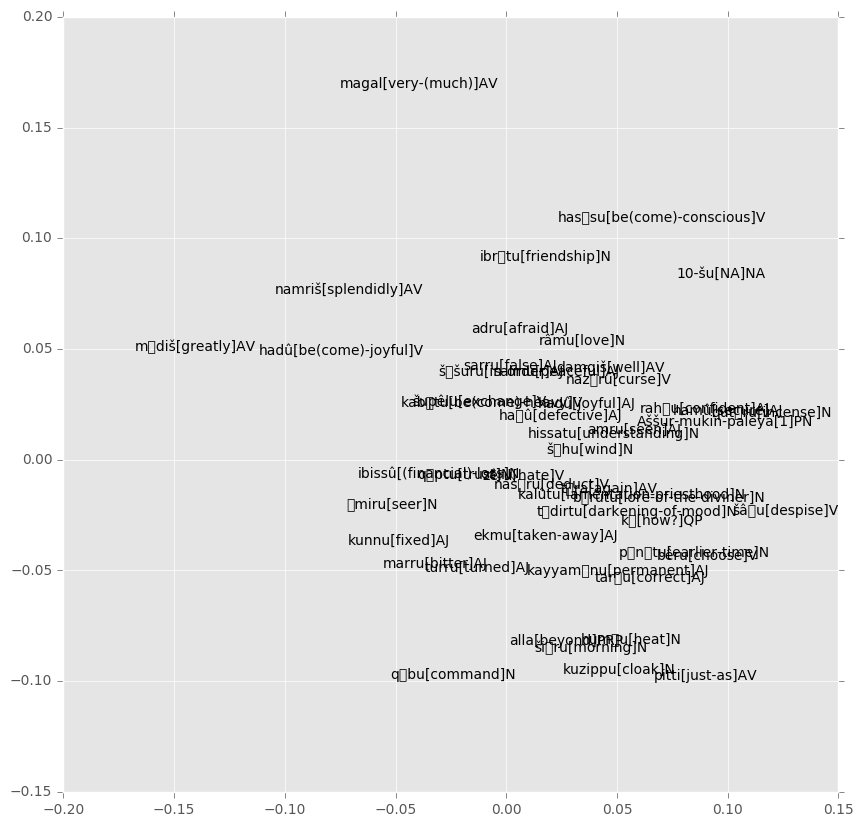

In [26]:
# Fussing with matplotlib

_, ax = plt.subplots(figsize=(10,10))
ax.scatter(embeddings[:,0], embeddings[:,1], alpha=0)
for i in range(len(vectors)):
    ax.annotate(good_tokens[i], ((embeddings[i,0], embeddings[i,1])))

In [27]:
model.most_similar(['lemnu[bad]AJ', 'masku[bad]AJ'])

[('utukku[(an-evil-demon)]N', 0.9546674489974976),
 ('alû[(an-evil-demon)]N', 0.9445865154266357),
 ('zēru[hated]AJ', 0.9405960440635681),
 ('labāṣu[(a-disease-demon)]N', 0.9310439229011536),
 ('duppuru[move-away]V', 0.927264928817749),
 ('asakku[(a-demon-or-illness)]N', 0.9268977642059326),
 ('rusû[dissolution?]N', 0.9267439842224121),
 ('raggu[wicked]AJ', 0.9265545606613159),
 ('upīšū[(magical)-procedures]N', 0.9257888197898865),
 ('rusû[sorcery]N', 0.9250555038452148)]

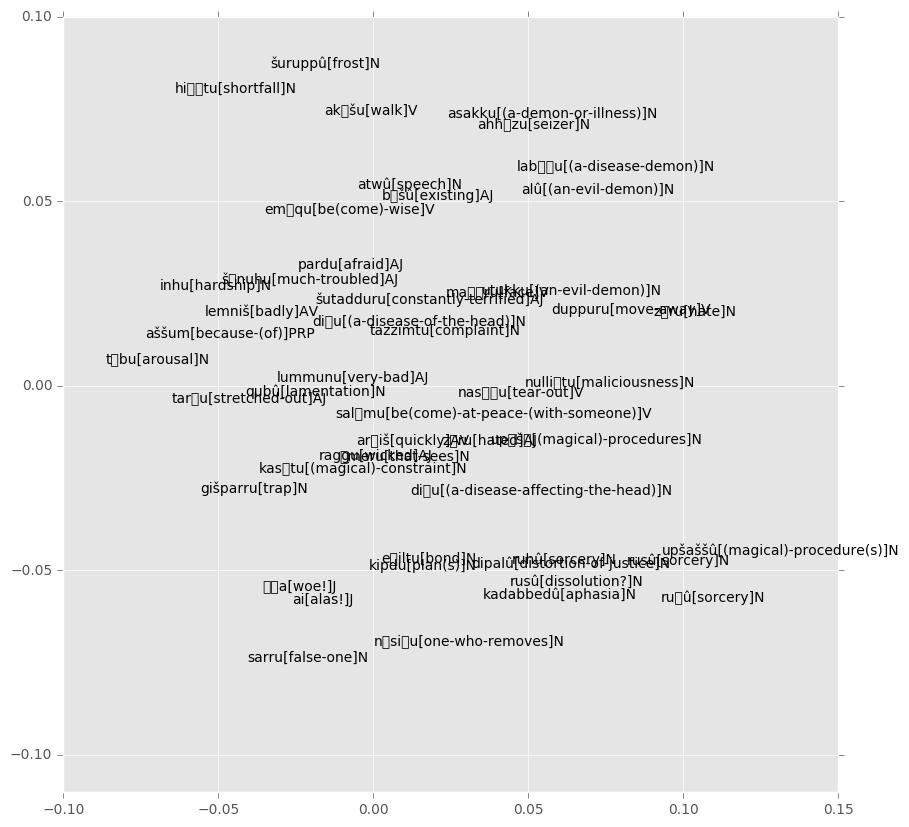

In [28]:
# For comparison, here is the same graph using a vector for words meaning 'bad'

bad_tokens = [token for token,weight in model.most_similar(['lemnu[bad]AJ', 'masku[bad]AJ'], topn=50)]
vectors = [model[word] for word in bad_tokens]
dist_matrix = pairwise.pairwise_distances(vectors, metric='cosine')
mds = MDS(n_components = 2, dissimilarity='precomputed')
embeddings = mds.fit_transform(dist_matrix)
_, ax = plt.subplots(figsize=(10,10))
ax.scatter(embeddings[:,0], embeddings[:,1], alpha=0)
for i in range(len(vectors)):
    ax.annotate(bad_tokens[i], ((embeddings[i,0], embeddings[i,1])))
    ax.set_xlim(-.1, .15)
    ax.set_ylim(-.11, .1)

In [29]:
#other binaries
#sick and healthy
model.most_similar(['marṣu[sick]AJ'], topn=10)

[('rehû[pour-out]V', 0.8633474111557007),
 ('ummu[heat]N', 0.8554458618164062),
 ('ṣarhu[hot]AJ', 0.85128253698349),
 ('zūtu[sweat]N', 0.8503219485282898),
 ('liʾbu[(a-disease)]N', 0.8498961925506592),
 ('himṭu[burning]N', 0.8483445048332214),
 ('napāṣu[push-away]V', 0.8449668288230896),
 ('emēmu[be(come)-hot]V', 0.8414089679718018),
 ('hayyattu[terror]N', 0.8408250212669373),
 ('šimmatu[paralysis]N', 0.8406922817230225)]

In [31]:
#Is there a word for healthy?
model.most_similar(['šulmu[completeness]N'], topn=10)

[('adanniš[very-much]AV', 0.8098540306091309),
 ('lū[may]MOD', 0.764792263507843),
 ('Nabu-ahhe-eriba[1]PN', 0.7537745237350464),
 ('Ašipa[1]PN', 0.7490809559822083),
 ('bēlu[lord]N', 0.745185911655426),
 ('Issar-šumu-ereš[1]PN', 0.7438656091690063),
 ('Adad-šumu-uṣur[1]PN', 0.7419830560684204),
 ('Inurta-ilaʾi[1]PN', 0.7407424449920654),
 ('Qurdi-Aššur[1]PN', 0.7382898926734924),
 ('Duri-Aššur[02]PN', 0.7364245653152466)]

In [32]:
model.most_similar(['masku[bad]AJ'])

[('kasītu[(magical)-constraint]N', 0.9587082862854004),
 ('salāmu[be(come)-at-peace-(with-someone)]V', 0.9577629566192627),
 ('šurpu[burning]N', 0.9571117162704468),
 ('zēru[hated]AJ', 0.9551829099655151),
 ('raggu[wicked]AJ', 0.954066276550293),
 ('diʾu[(a-disease-affecting-the-head)]N', 0.9534728527069092),
 ('imṭû[loss(es)]N', 0.9529440402984619),
 ('arḫiš[quickly]AV', 0.9528999328613281),
 ('ḫalāqu[be(come)-lost]V', 0.9527678489685059),
 ('āmeru[that-sees]N', 0.9521583914756775)]

In [33]:
model.most_similar(['lemnu[bad]AJ'])

[('utukku[(an-evil-demon)]N', 0.9030976891517639),
 ('alû[(an-evil-demon)]N', 0.8964114189147949),
 ('upšaššû[(magical)-procedure(s)]N', 0.8954698443412781),
 ('rusû[sorcery]N', 0.8875930309295654),
 ('ruḫû[sorcery]N', 0.8859874606132507),
 ('duppuru[move-away]V', 0.8741639852523804),
 ('labāṣu[(a-disease-demon)]N', 0.8697705268859863),
 ('asakku[(a-demon-or-illness)]N', 0.8642227053642273),
 ('zēru[hated]AJ', 0.8553037047386169),
 ('hiṭītu[shortfall]N', 0.8539451956748962)]

In [149]:
model.most_similar(['masku[bad]AJ','lemnu[bad]AJ'])

[('utukku[(an-evil-demon)]N', 0.9608134031295776),
 ('alû[(an-evil-demon)]N', 0.9531477093696594),
 ('ruhû[sorcery]N', 0.9429439306259155),
 ('zēru[hated]AJ', 0.9409821033477783),
 ('rusû[dissolution?]N', 0.9385172128677368),
 ('labāṣu[(a-disease-demon)]N', 0.9377480149269104),
 ('ai[alas!]J', 0.9341796040534973),
 ('rusû[sorcery]N', 0.9313101768493652),
 ('diʾu[(a-disease-affecting-the-head)]N', 0.9307929873466492),
 ('dipalû[distortion-of-justice]N', 0.9298144578933716)]

In [34]:
#try to find different senses of the word bad by removing the vector for 'an evil demon'
model.most_similar(positive=['masku[bad]AJ','lemnu[bad]AJ'], negative=['utukku[(an-evil-demon)]N'], topn=50)

[('zēru[hated]AJ', 0.8728823065757751),
 ('alû[(an-evil-demon)]N', 0.8621426820755005),
 ('dipalû[distortion-of-justice]N', 0.8487517833709717),
 ('asakku[(a-demon-or-illness)]N', 0.8454409241676331),
 ('nulliātu[maliciousness]N', 0.8437561988830566),
 ('tānēhu[moaning]N', 0.8418797850608826),
 ('imṭû[loss(es)]N', 0.8401064276695251),
 ('rusû[sorcery]N', 0.8397781252861023),
 ('siliʾtu[sickness]N', 0.8389708995819092),
 ('ai[alas!]J', 0.8389651775360107),
 ('ūʾa[woe!]J', 0.8385834693908691),
 ('sarru[false-one]N', 0.8382155895233154),
 ('kirimmu[(crook-of)-arm]N', 0.8377361297607422),
 ('upīšū[(magical)-procedures]N', 0.8376305103302002),
 ('kasītu[(magical)-constraint]N', 0.8367948532104492),
 ('kūru[depression]N', 0.8364951014518738),
 ('rusû[dissolution?]N', 0.836256742477417),
 ('qubû[lamentation]N', 0.8345703482627869),
 ('upšaššû[(magical)-procedure(s)]N', 0.8345082998275757),
 ('lūtu[debility]N', 0.8343023061752319),
 ('damāmu[wail]V', 0.832485556602478),
 ('mūtānū[epidemic]N', 

In [35]:
#remove more vectors to get at different senses of the word 'bad'
model.most_similar(positive=['masku[bad]AJ','lemnu[bad]AJ'], negative=['utukku[(an-evil-demon)]N','dipalû[distortion-of-justice]N'])

[('pīhātu[post]N', 0.18828213214874268),
 ('māhāzu[shrine]N', 0.1772666573524475),
 ('Kiš[Kish]SN', 0.17050638794898987),
 ('Babili[Babylon]SN', 0.13324309885501862),
 ('{ITI}x[NA]NA', 0.1269819438457489),
 ('x-KAM₂[NA]NA', 0.12245430052280426),
 ('Kute[Cutha]SN', 0.11652623116970062),
 ('22-KAM₂[NA]NA', 0.1134396344423294),
 ('sīhu[rebellion]N', 0.11269722878932953),
 ('hurbāšu[frost]N', 0.10636472702026367)]

My uninformed opinion: there are (at least) four meanings of the word 'bad': Demon and sorcery, distortion of justice, and war/agriculture

In [36]:
#do the same for 'good'
model.most_similar(['damqu[good]AJ', 'ṭābu[good]AJ'])

[('hadû[joyful]AJ', 0.8387885093688965),
 ('mādiš[greatly]AV', 0.8366856575012207),
 ('hissatu[understanding]N', 0.8266851902008057),
 ('tūra[again]AV', 0.8263546824455261),
 ('turru[turned]AJ', 0.8230162858963013),
 ('šēhu[wind]N', 0.8216396570205688),
 ('kalûtu[lamentation-priesthood]N', 0.8204102516174316),
 ('zêru[hate]V', 0.8185923099517822),
 ('kabātu[be(come)-heavy]V', 0.8135282397270203),
 ('kunnu[fixed]AJ', 0.8115489482879639)]

In [37]:
model.most_similar(positive=['damqu[good]AJ', 'ṭābu[good]AJ'], negative=['hadû[joyful]AJ'])

[('mādiš[greatly]AV', 0.5842231512069702),
 ('erīšu[scent]N', 0.5594542026519775),
 ('ṣillu[shade]N', 0.5524441003799438),
 ('igulû[fine-ointment]N', 0.5518783330917358),
 ('gamāru[complete]V', 0.5431886911392212),
 ('nawru[bright]AJ', 0.5393788814544678),
 ('walādu[give-birth-to]V', 0.5341538786888123),
 ('karānu[vine]N', 0.5327973365783691),
 ('adanniš[very-much]AV', 0.5314599871635437),
 ('eššu[new]AJ', 0.5298138856887817)]

In [171]:
#another binary: big and small?
model.most_similar('rabbû[very-big]AJ')

[('kisû[footing]N', 0.9483045339584351),
 ('tallaktu[walkway]N', 0.9285508990287781),
 ('asurrû[lower-course]N', 0.9282196760177612),
 ('mithartu[(side-of-a)-square]N', 0.9244913458824158),
 ('wuṣṣû[spread-out]V', 0.9191648960113525),
 ('māšu[twin]AJ', 0.9190644025802612),
 ('sahpu[overthrown]AJ', 0.9190335273742676),
 ('titūru[causeway]N', 0.9188124537467957),
 ('hittu[lintel]N', 0.9177705645561218),
 ('50.AM₃[NA]NA', 0.917052686214447)]

In [170]:
model.most_similar('ṣehru[small]AJ')

[('nību[naming]N', 0.7263467311859131),
 ('liwītu[packaging]N', 0.7233339548110962),
 ('namkūru[property]N', 0.7016836404800415),
 ('bābtu[city-quarter]N', 0.6993434429168701),
 ('75[NA]NA', 0.696563184261322),
 ('burrû[(a-temple-servant)]N', 0.6956548690795898),
 ('dakāku[gambol]V', 0.6908508539199829),
 ('ṣehru[small-one]N', 0.6865143179893494),
 ('Ṣariptu[Ṣarepta]SN', 0.6823419332504272),
 ('ṣehhertu[young-girl]N', 0.6807389259338379)]